In [ ]:
%matplotlib inline
import numpy as np
import cv2
import os
from tqdm import tqdm
import imutils
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/train',
    target_size=(240, 240, 3),
    batch_size=32,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/val',
    target_size=(240, 240, 3),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/test',
    target_size=(240, 240, 3),
    batch_size=32,
    class_mode='binary')
"""

In [ ]:
train = []
val = []
test = []
train_lbl = []
val_lbl = []
test_lbl = []

def loaddata(path,img_list,label_list, label):
    all_images = os.listdir(path)
    for image in tqdm(all_images):
        img = cv2.imread(os.path.join(path, image))
        img_list.append(img)
        label_list.append(label)
 

#INME YOK 

In [ ]:
path1 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/INME_YOK/train'
path2 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/INME_YOK/val'
path3 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/INME_YOK/test'

loaddata(path1,train,train_lbl,0)
loaddata(path2,val,val_lbl,0)
loaddata(path3,test,test_lbl,0)

100%|██████████| 1000/1000 [04:40<00:00,  3.56it/s]


#ISKEMI

In [ ]:
path1 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/ISKEMI/train'
path2 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/ISKEMI/val'
path3 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/ISKEMI/test'

loaddata(path1,train,train_lbl,1)
loaddata(path2,val,val_lbl,1)
loaddata(path3,test,test_lbl,1)

100%|██████████| 500/500 [02:35<00:00,  3.22it/s]


#KANAMA

In [ ]:
path1 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/KANAMA/train'
path2 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/KANAMA/val'
path3 = '/content/gdrive/My Drive/TeknofestETAP1/DATA_ORIG/KANAMA/test'

loaddata(path1,train,train_lbl,1)
loaddata(path2,val,val_lbl,1)
loaddata(path3,test,test_lbl,1)

100%|██████████| 500/500 [02:14<00:00,  3.71it/s]


In [ ]:
import random

def zipici(img, lbl):
    arifk = list(zip(img, lbl))
    random.shuffle(arifk)
    img, lbl = zip(*arifk)
    return img, lbl

In [ ]:
train, train_lbl = zipici(train, train_lbl)
val, val_lbl = zipici(val, val_lbl)
test, test_lbl = zipici(test, test_lbl)

In [ ]:
X_train = np.array(train)
y_train = np.array(train_lbl)

X_val = np.array(val)
y_val = np.array(val_lbl)

X_test = np.array(test)
y_test = np.array(test_lbl)

In [ ]:
"""
np.save('/content/gdrive/My Drive/TeknofestETAP1/Weights/Custom/yesyescustom_img.npy', img)
np.save('/content/gdrive/My Drive/TeknofestETAP1/Weights/Custom/yesyescustom_lbl.npy', lbl)
"""

"img = np.load('/content/gdrive/My Drive/TeknofestETAP1/Weights/Custom/yesyescustom_img.npy')\nlbl = np.load('/content/gdrive/My Drive/TeknofestETAP1/Weights/Custom/yesyescustom_lbl.npy')"

In [ ]:
"""
img = np.load('/content/gdrive/My Drive/TeknofestETAP1/Weights/Custom/yesyescustom_img.npy')
lbl = np.load('/content/gdrive/My Drive/TeknofestETAP1/Weights/Custom/yesyescustom_lbl.npy')
"""

In [ ]:
"""
del image_list
del label_list
import gc
gc.collect()
"""

In [ ]:
#X_train, X_test,y_train, y_test = train_test_split(imgTrain,lblTrain, test_size=0.1,random_state=32, shuffle= True)

In [ ]:
"""
del img
del lbl
import gc
gc.collect()
"""

83

# CUSTOM MODEL

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 240, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
"""
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
"""

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall()])

In [ ]:
X_train[2].shape

(240, 240, 3)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=60)

Epoch 1/60
720/720 [==============================] - 75s 58ms/step - loss: 0.6652 - accuracy: 0.6444 - precision: 0.6434 - recall: 0.6481 - val_loss: 1.1973 - val_accuracy: 0.5900 - val_precision: 0.5539 - val_recall: 0.9250
Epoch 2/60
720/720 [==============================] - 44s 61ms/step - loss: 0.6473 - accuracy: 0.6340 - precision: 0.6376 - recall: 0.6211 - val_loss: 0.6744 - val_accuracy: 0.7000 - val_precision: 0.7151 - val_recall: 0.6650
Epoch 3/60
720/720 [==============================] - 44s 60ms/step - loss: 0.6658 - accuracy: 0.5990 - precision: 0.5949 - recall: 0.6206 - val_loss: 0.6244 - val_accuracy: 0.6338 - val_precision: 0.6864 - val_recall: 0.4925
Epoch 4/60
720/720 [==============================] - 44s 61ms/step - loss: 0.6223 - accuracy: 0.6503 - precision: 0.6531 - recall: 0.6411 - val_loss: 0.6280 - val_accuracy: 0.6175 - val_precision: 0.5732 - val_recall: 0.9200
Epoch 5/60
720/720 [==============================] - 44s 60ms/step - loss: 0.5797 - accuracy: 0

KeyboardInterrupt: ignored

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=34)

Epoch 1/34
720/720 [==============================] - 44s 61ms/step - loss: 0.5034 - accuracy: 0.7475 - precision: 0.7384 - recall: 0.7667 - val_loss: 0.5139 - val_accuracy: 0.7425 - val_precision: 0.7539 - val_recall: 0.7200
Epoch 2/34
720/720 [==============================] - 43s 59ms/step - loss: 0.5166 - accuracy: 0.7393 - precision: 0.7360 - recall: 0.7464 - val_loss: 0.4932 - val_accuracy: 0.7462 - val_precision: 0.7385 - val_recall: 0.7625
Epoch 3/34
720/720 [==============================] - 44s 61ms/step - loss: 0.4826 - accuracy: 0.7664 - precision: 0.7616 - recall: 0.7756 - val_loss: 0.4980 - val_accuracy: 0.7450 - val_precision: 0.7168 - val_recall: 0.8100
Epoch 4/34
720/720 [==============================] - 43s 60ms/step - loss: 0.4476 - accuracy: 0.7894 - precision: 0.7890 - recall: 0.7903 - val_loss: 0.6304 - val_accuracy: 0.7138 - val_precision: 0.8940 - val_recall: 0.4850
Epoch 5/34
720/720 [==============================] - 43s 60ms/step - loss: 0.4331 - accuracy: 0

KeyboardInterrupt: ignored

In [ ]:
#history = model.fit(X_train,y_train,validation_split=0.1,batch_size=10, epochs=60)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

94/94 [==============================] - 7s 55ms/step - loss: 0.2767 - accuracy: 0.8950 - precision_1: 0.9201 - recall_1: 0.8607
Test loss: 0.2766520380973816
Test accuracy: 0.8950349688529968


In [ ]:
#PATH DEĞİŞTİR HER EĞİTİMDEN SONRA !!!!!!!!!!!!!!!!!!!!
model.save('/content/gdrive/My Drive/TeknofestETAP1/Weights/Custom/CustomModel.h5') 

#  LOAD MODEL
#model1 = load_model('brain_tumor_vgg16.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may 

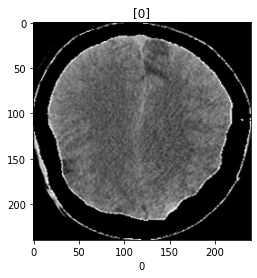

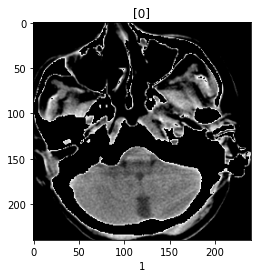

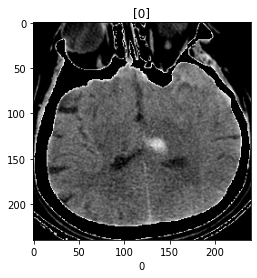

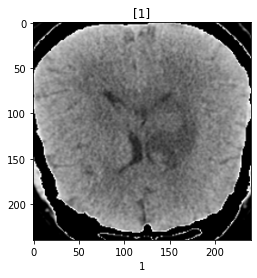

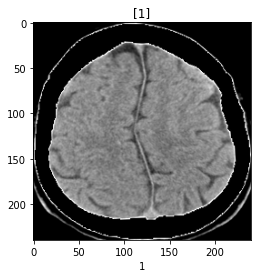

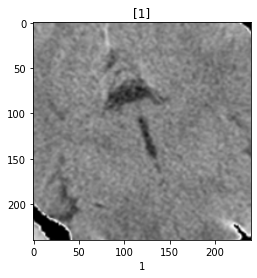

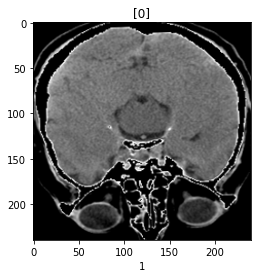

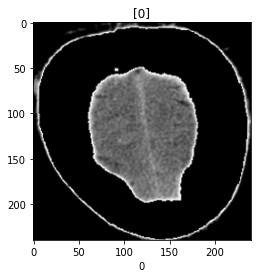

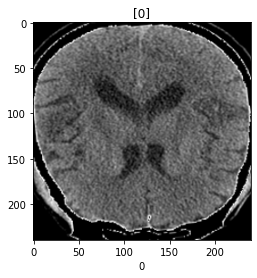

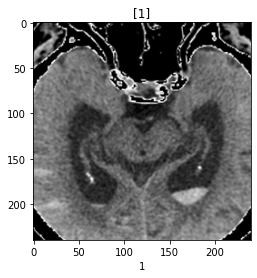

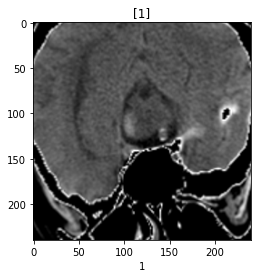

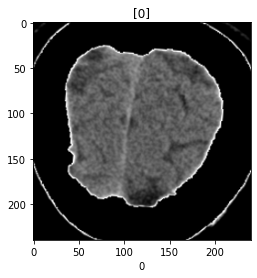

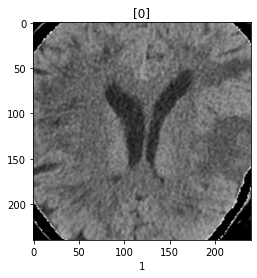

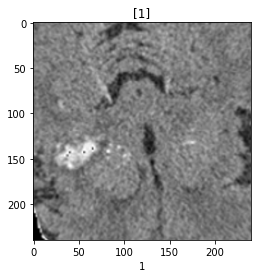

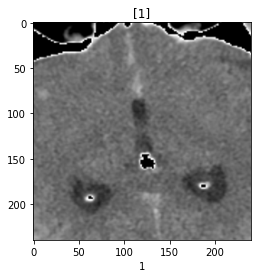

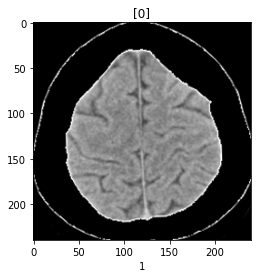

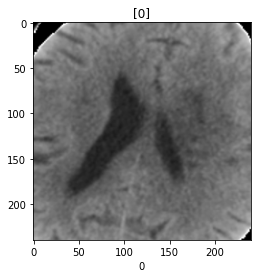

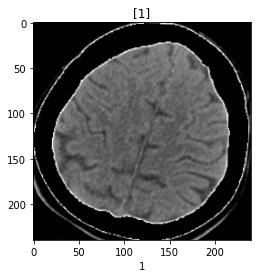

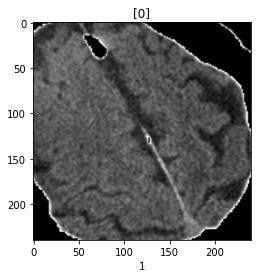

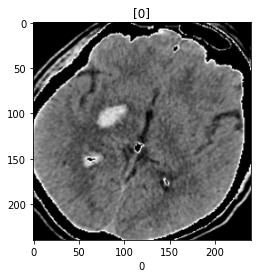

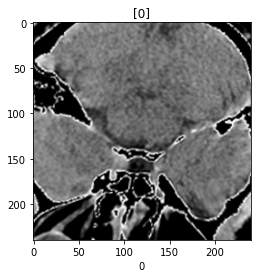

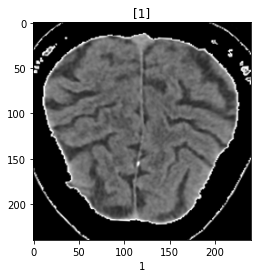

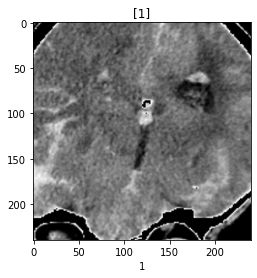

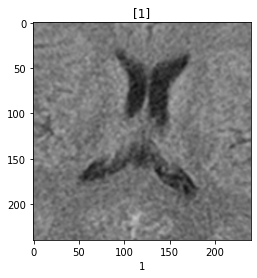

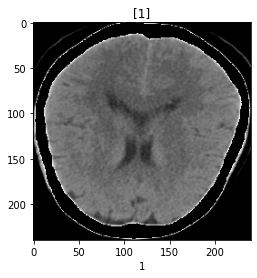

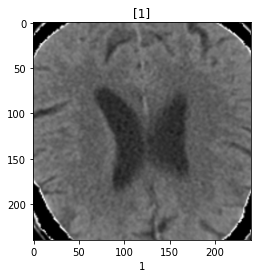

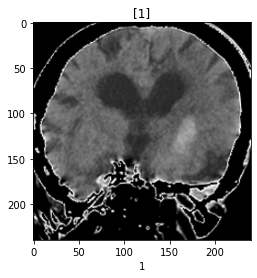

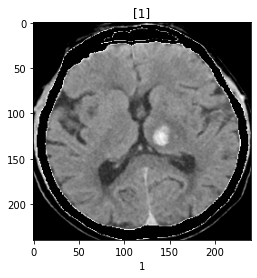

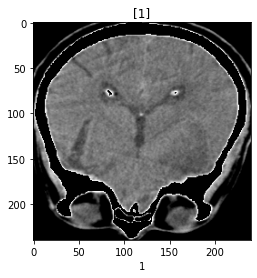

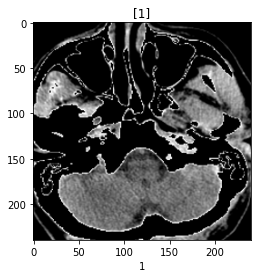

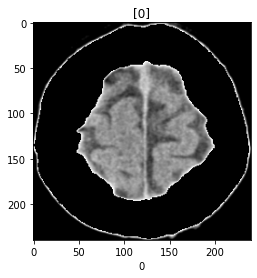

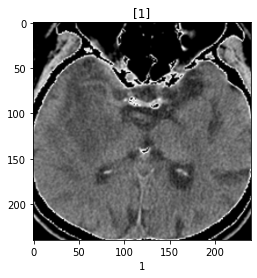

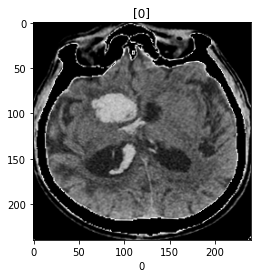

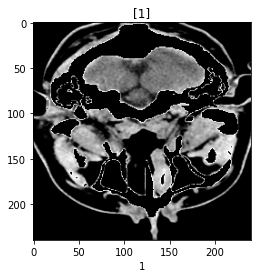

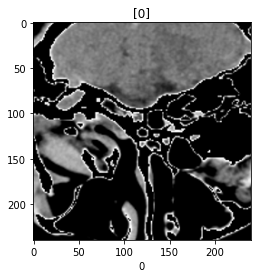

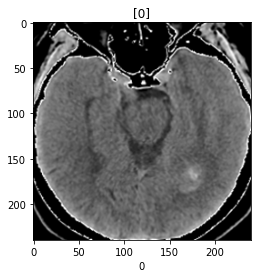

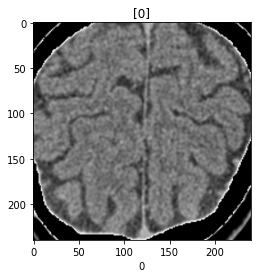

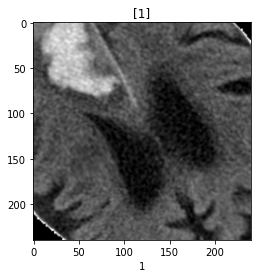

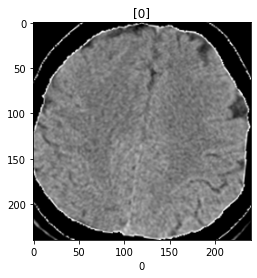

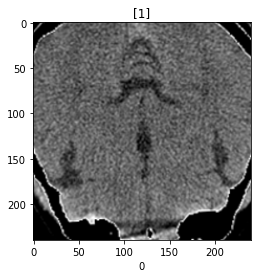

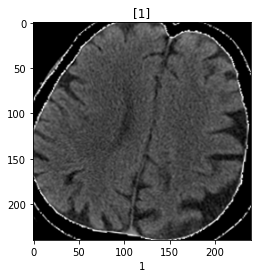

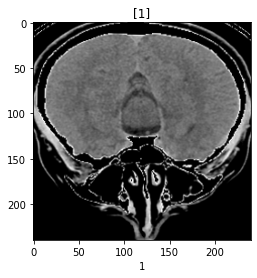

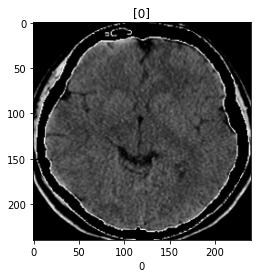

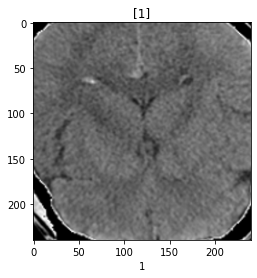

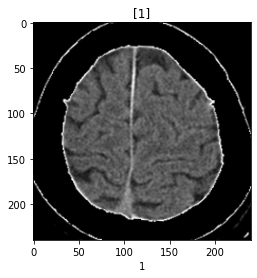

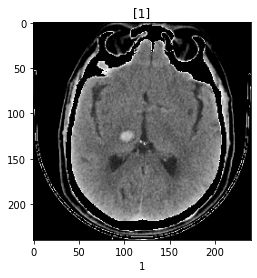

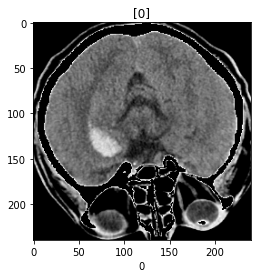

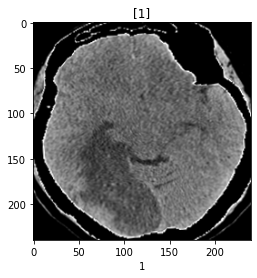

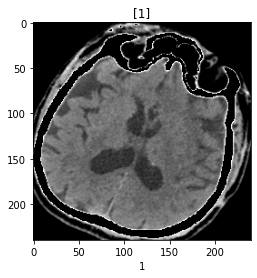

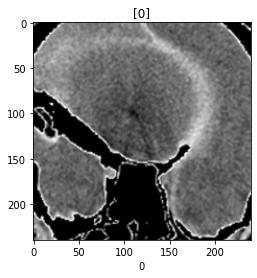

In [ ]:
ynew = model.predict_classes(X_test)
count = 0
index = 0
for img in X_test[100:150]:
    plt.figure()
    plt.title(ynew[index])
    plt.xlabel(y_test[index])
    plt.imshow(img)
    index = index +1